# Grover's Algorithm and Amplitude Amplification
[IBM QISKIT Grover notebook source](https://qiskit-community.github.io/qiskit-algorithms/tutorials/06_grover.html)

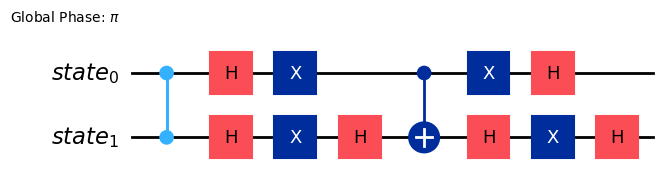

In [1]:
from qiskit import QuantumCircuit
from qiskit_algorithms import AmplificationProblem

# the state we desire to find is '11'
good_state = ["11"]

# specify the oracle that marks the state '11' as a good solution
oracle = QuantumCircuit(2)
oracle.cz(0, 1)

# define Grover's algorithm
problem = AmplificationProblem(oracle, is_good_state=good_state)

# now we can have a look at the Grover operator that is used in running the algorithm
# (Algorithm circuits are wrapped in a gate to appear in composition as a block
# so we have to decompose() the op to see it expanded into its component gates.)
problem.grover_operator.decompose().draw(output="mpl")

In [2]:
from qiskit_algorithms import Grover
from qiskit.primitives import Sampler


grover = Grover(sampler=Sampler())
result = grover.amplify(problem)
print("Result type:", type(result))
print()
print("Success!" if result.oracle_evaluation else "Failure!")
print("Top measurement:", result.top_measurement)

Result type: <class 'qiskit_algorithms.amplitude_amplifiers.grover.GroverResult'>

Success!
Top measurement: 11


/tmp/ipykernel_45622/808285332.py:5: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  grover = Grover(sampler=Sampler())


In [3]:
from qiskit.quantum_info import Statevector

oracle = Statevector.from_label("11")
problem = AmplificationProblem(oracle, is_good_state=["11"])

grover = Grover(sampler=Sampler())
result = grover.amplify(problem)
print("Result type:", type(result))
print()
print("Success!" if result.oracle_evaluation else "Failure!")
print("Top measurement:", result.top_measurement)

Result type: <class 'qiskit_algorithms.amplitude_amplifiers.grover.GroverResult'>

Success!
Top measurement: 11


/tmp/ipykernel_45622/1906973721.py:6: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  grover = Grover(sampler=Sampler())


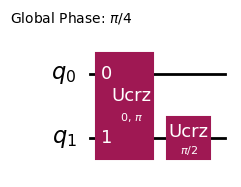

In [4]:
problem.grover_operator.oracle.decompose().draw(output="mpl")

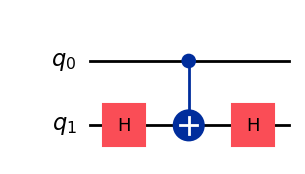

In [5]:
from qiskit.circuit.library.phase_oracle import PhaseOracle
from qiskit.exceptions import MissingOptionalLibraryError

# `Oracle` (`PhaseOracle`) as the `oracle` argument
expression = "(a & b)"
try:
    oracle = PhaseOracle(expression)
    problem = AmplificationProblem(oracle)
    display(problem.grover_operator.oracle.decompose().draw(output="mpl"))
except MissingOptionalLibraryError as ex:
    print(ex)

state preparation circuit:


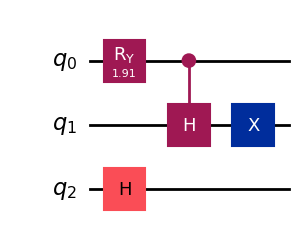

In [6]:
import numpy as np

# Specifying `state_preparation`
# to prepare a superposition of |01>, |10>, and |11>
oracle = QuantumCircuit(3)
oracle.ccz(0, 1, 2)

theta = 2 * np.arccos(1 / np.sqrt(3))
state_preparation = QuantumCircuit(3)
state_preparation.ry(theta, 0)
state_preparation.ch(0, 1)
state_preparation.x(1)
state_preparation.h(2)

# we only care about the first two bits being in state 1, thus add both possibilities for the last qubit
problem = AmplificationProblem(
    oracle, state_preparation=state_preparation, is_good_state=["110", "111"]
)

# state_preparation
print("state preparation circuit:")
problem.grover_operator.state_preparation.draw(output="mpl")

In [7]:
grover = Grover(sampler=Sampler())
result = grover.amplify(problem)
print("Success!" if result.oracle_evaluation else "Failure!")
print("Top measurement:", result.top_measurement)

Success!
Top measurement: 111


/tmp/ipykernel_45622/336064450.py:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  grover = Grover(sampler=Sampler())


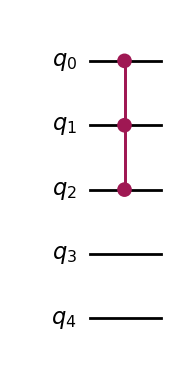

In [8]:
oracle = QuantumCircuit(5)
oracle.ccz(0, 1, 2)
oracle.draw(output="mpl")

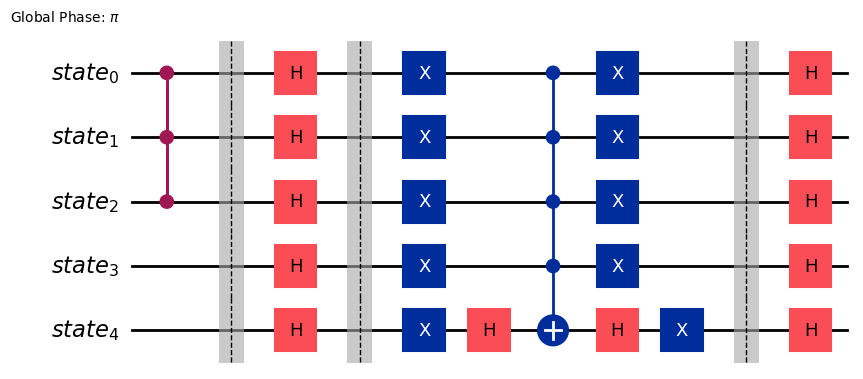

In [9]:
from qiskit.circuit.library import GroverOperator

grover_op = GroverOperator(oracle, insert_barriers=True)
grover_op.decompose().draw(output="mpl")

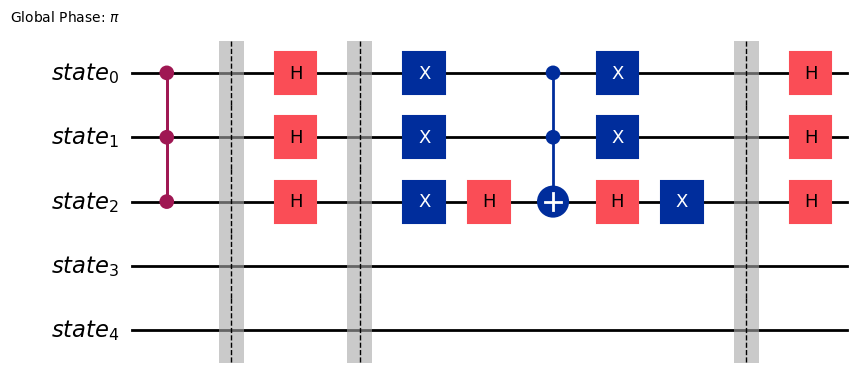

In [10]:
grover_op = GroverOperator(oracle, reflection_qubits=[0, 1, 2], insert_barriers=True)
grover_op.decompose().draw(output="mpl")

In [11]:
# a list of binary strings good state
oracle = QuantumCircuit(2)
oracle.cz(0, 1)
good_state = ["11", "00"]
problem = AmplificationProblem(oracle, is_good_state=good_state)
print(problem.is_good_state("11"))

True


In [12]:
# a list of integer good state
oracle = QuantumCircuit(2)
oracle.cz(0, 1)
good_state = [0, 1]
problem = AmplificationProblem(oracle, is_good_state=good_state)
print(problem.is_good_state("11"))

True


In [13]:
from qiskit.quantum_info import Statevector

# `Statevector` good state
oracle = QuantumCircuit(2)
oracle.cz(0, 1)
good_state = Statevector.from_label("11")
problem = AmplificationProblem(oracle, is_good_state=good_state)
print(problem.is_good_state("11"))

True


In [14]:
# Callable good state
def callable_good_state(bitstr):
    if bitstr == "11":
        return True
    return False


oracle = QuantumCircuit(2)
oracle.cz(0, 1)
problem = AmplificationProblem(oracle, is_good_state=good_state)
print(problem.is_good_state("11"))

True


In [15]:
# integer iteration
oracle = QuantumCircuit(2)
oracle.cz(0, 1)
problem = AmplificationProblem(oracle, is_good_state=["11"])
grover = Grover(iterations=1)

In [16]:
# list iteration
oracle = QuantumCircuit(2)
oracle.cz(0, 1)
problem = AmplificationProblem(oracle, is_good_state=["11"])
grover = Grover(iterations=[1, 2, 3])

In [17]:
# using sample_from_iterations
oracle = QuantumCircuit(2)
oracle.cz(0, 1)
problem = AmplificationProblem(oracle, is_good_state=["11"])
grover = Grover(iterations=[1, 2, 3], sample_from_iterations=True)

In [18]:
iterations = Grover.optimal_num_iterations(num_solutions=1, num_qubits=8)
iterations

12

In [19]:
def to_DIAMACS_CNF_format(bit_rep):
    return [index + 1 if val == 1 else -1 * (index + 1) for index, val in enumerate(bit_rep)]


oracle = QuantumCircuit(2)
oracle.cz(0, 1)
problem = AmplificationProblem(oracle, is_good_state=["11"], post_processing=to_DIAMACS_CNF_format)
problem.post_processing([1, 0, 1])

[1, -2, 3]

[IBM QISKIT Grover Examples](https://qiskit-community.github.io/qiskit-algorithms/tutorials/07_grover_examples.html)

In [20]:
input_3sat_instance = """
c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0
"""

In [21]:
import os
import tempfile
from qiskit.exceptions import MissingOptionalLibraryError
from qiskit.circuit.library.phase_oracle import PhaseOracle

fp = tempfile.NamedTemporaryFile(mode="w+t", delete=False)
fp.write(input_3sat_instance)
file_name = fp.name
fp.close()
oracle = None
try:
    oracle = PhaseOracle.from_dimacs_file(file_name)
except ImportError as ex:
    print(ex)
finally:
    os.remove(file_name)

In [22]:
from qiskit_algorithms import AmplificationProblem

problem = None
if oracle is not None:
    problem = AmplificationProblem(oracle, is_good_state=oracle.evaluate_bitstring)

In [23]:
from qiskit_algorithms import Grover
from qiskit.primitives import Sampler

grover = Grover(sampler=Sampler())
result = None
if problem is not None:
    result = grover.amplify(problem)
    print(result.assignment)

000


/tmp/ipykernel_45622/852366760.py:4: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  grover = Grover(sampler=Sampler())


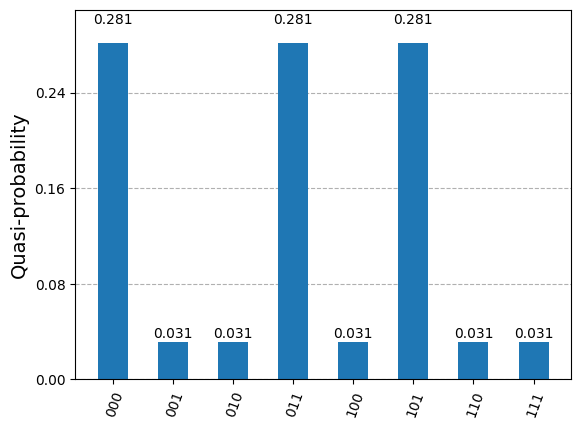

In [24]:
from qiskit.visualization import plot_histogram

if result is not None:
    display(plot_histogram(result.circuit_results[0]))

/tmp/ipykernel_45622/1049556995.py:5: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  grover = Grover(sampler=Sampler())


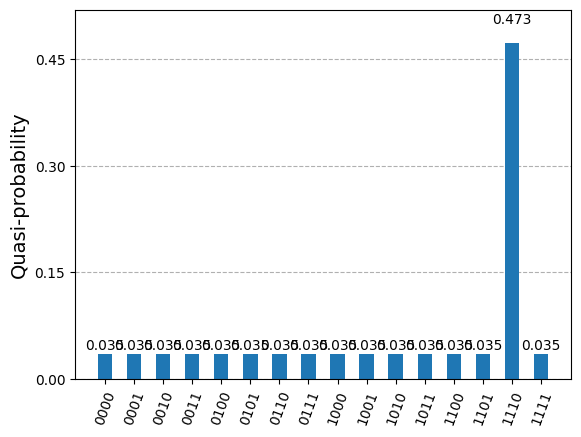

In [25]:
expression = "(w ^ x) & ~(y ^ z) & (x & y & z)"
try:
    oracle = PhaseOracle(expression)
    problem = AmplificationProblem(oracle, is_good_state=oracle.evaluate_bitstring)
    grover = Grover(sampler=Sampler())
    result = grover.amplify(problem)
    display(plot_histogram(result.circuit_results[0]))
except MissingOptionalLibraryError as ex:
    print(ex)